# **Fruit Classification using a Dense, Convolutional and Residual Neural Network**

---

## **Introduction**

In this notebook, I will be using fruits dataset. The dataset contains 360 images of 9 different types of fruits - apple, banana, cherry, chickoo, grapes, kiwi, mango, orange, and strawberry. Each type of fruit has 40 images. The images are in PNG format and have different dimensions. The dataset can be found [here](https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images/data)

**The goal of this notebook is to classify the fruits using Dense and Convolutional Neural Networks.**


## **Table of Contents**

1. [Importing Libraries and Dataset](#1.-Importing-Libraries-and-Dataset)
2. [Visualizing the Data](#2.-Visualizing-the-Data)
3. [Preparing the Data](#3.-Preparing-the-Data)
4. [Building the Model](#4.-Building-the-Model)  
    4.1 [Dense Neural Network](#4.1-Dense-Neural-Network)  
    4.2 [Convolutional Neural Network](#4.2-Convolutional-Neural-Network)  
    4.3 [ResNet50](#4.3-ResNet50)

## **1. Importing Libraries and Dataset**

---


In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import warnings

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50

warnings.filterwarnings('ignore')

In [2]:
data_dir = './data/images'

print('All directories: ', os.listdir(data_dir))

All directories:  ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']


## **2. Visualizing the Data**

[Back to Top](#Table-of-Contents)

---

First, let's see what the distribution of the classes is in the dataset.

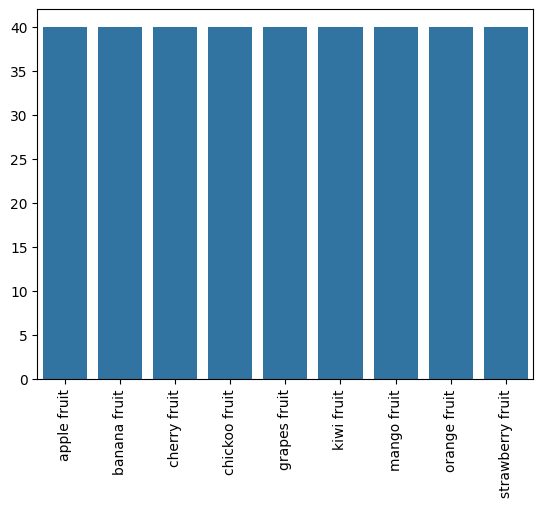

In [3]:
class_distribution = {}
for class_name in os.listdir(data_dir):
    class_distribution[class_name] = len(os.listdir(os.path.join(data_dir, class_name)))
    
distribution = sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
distribution.set_xticklabels(distribution.get_xticklabels(), rotation=90)
plt.show()

We can see that the dataset is perfectly balanced with 40 images per class.


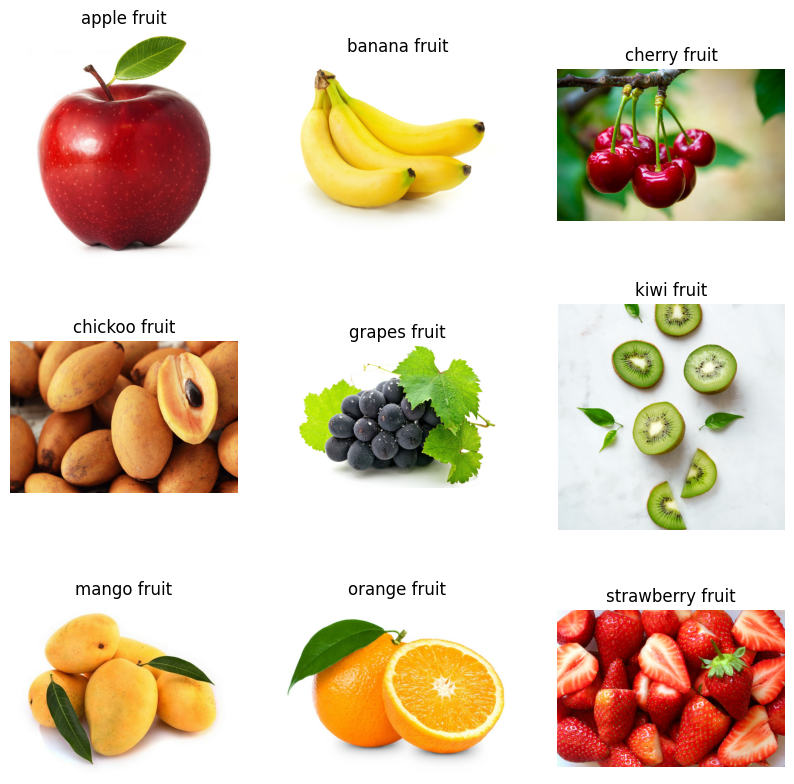

In [4]:
fig = plt.figure(figsize=(10, 10))
for i, class_name in enumerate(os.listdir(data_dir)):
    img = Image.open(os.path.join(data_dir, class_name, os.listdir(os.path.join(data_dir, class_name))[0]))
    fig.add_subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
    
plt.show()

Here we see some images from the dataset. The images are relatively equal in size and most of them are centered around the fruit.


## **3. Preparing the Data**

[Back to Top](#Table-of-Contents)

---

In [5]:
def load_images(data_dir):
    images = []
    labels = []
    for class_name in os.listdir(data_dir):
        for image_name in os.listdir(os.path.join(data_dir, class_name)):
            img = load_img(os.path.join(data_dir, class_name, image_name), target_size=(128, 128))
            img = img_to_array(img)
            images.append(img)
            labels.append(class_name)
    return np.array(images), np.array(labels)

images, labels = load_images(data_dir)
print('Images shape: ', images.shape)

Images shape:  (360, 128, 128, 3)


Above we see that the images have a shape of (360, 128, 128, 3). This means that we have 360 images with a resolution of 128x128 pixels and 3 channels (RGB).


In [6]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels)

images = images / 255.0

Here we encode the labels and normalize the images. The labels are encoded using the LabelEncoder and then converted to categorical using to_categorical. The images are normalized by dividing them by 255.0, which gives us pixel values between 0 and 1.


## **4. Building the Model**

[Back to Top](#Table-of-Contents)

---

I will build two models - one using a Dense Neural Network and the other using a Convolutional Neural Network.

#### **4.1 Dense Neural Network**


In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(Flatten(input_shape=(128, 128, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=8)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.1334 - loss: 14.0153 - val_accuracy: 0.1389 - val_loss: 6.9854
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.0748 - loss: 7.6601 - val_accuracy: 0.1111 - val_loss: 5.7992
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.0922 - loss: 5.3334 - val_accuracy: 0.1250 - val_loss: 4.7563
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.1610 - loss: 4.1683 - val_accuracy: 0.0833 - val_loss: 5.7752
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.1633 - loss: 3.9951 - val_accuracy: 0.1528 - val_loss: 3.1932
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.2471 - loss: 2.6524 - val_accuracy: 0.1389 - val_loss: 2.3829
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.2385 - loss: 2.4454 - val_accuracy: 0.3194 - val_loss: 2.0514
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.3266 - loss: 1.8239 - val_accuracy: 0.2917 - val_loss

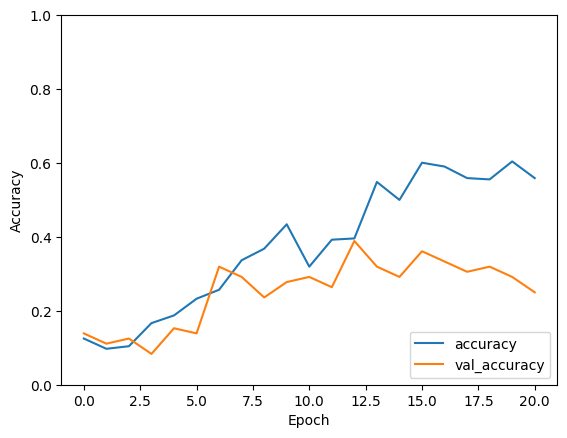

In [8]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()
    
plot_accuracy(history)

In [9]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

3/3 - 0s - 11ms/step - accuracy: 0.2500 - loss: 2.3860


What we can see here is that the Dense model is overfitting the training data. The training accuracy is 56.4% and the validation accuracy is 26.3%. This is a clear sign of overfitting. My guess is that the dataset is both too small, besides the fact that the Dense model is not the best model for image classification.


Let's plot the learning curve. A learning curve is a plot that shows the model's performance on the training and validation sets over time.

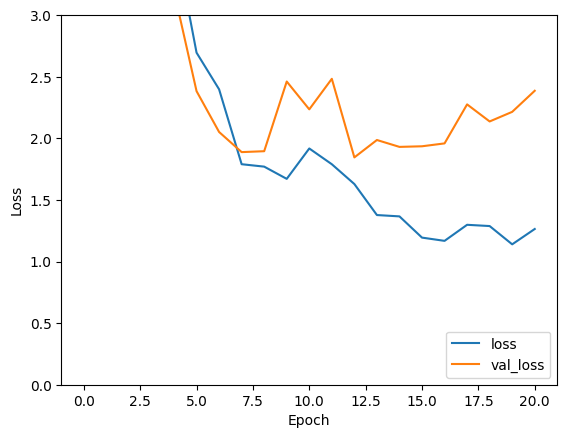

In [10]:
def plot_learning_curve(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 3])
    plt.legend(loc='lower right')
    plt.show()
    
plot_learning_curve(history)

At the start of training, the model is learning well, as both training and validation loss are decreasing. However, after a certain point, the model starts to memorize the training data and performs poorly on the validation data. This is a sign of overfitting. Also visible is the early stopping mechanism, which shows that the model does not overfit extremely.

#### **4.2 Convolutional Neural Network**


In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(9, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.0637 - loss: 2.3100 - val_accuracy: 0.2778 - val_loss: 2.0699
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.3300 - loss: 1.9730 - val_accuracy: 0.3333 - val_loss: 1.8199
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4257 - loss: 1.5580 - val_accuracy: 0.4444 - val_loss: 1.4276
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6186 - loss: 1.1372 - val_accuracy: 0.5556 - val_loss: 1.4569
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6078 - loss: 0.9581 - val_accuracy: 0.5000 - val_loss: 1.5779
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6837 - loss: 0.7801 - val_accuracy: 0.4722 - val_loss: 1.5914
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7263 - loss: 0.7245 - val_accuracy: 0.5278 - val_loss: 1.6861
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7693 - loss: 0.5541 - val_accuracy: 0.5556 - val_loss: 2.0779

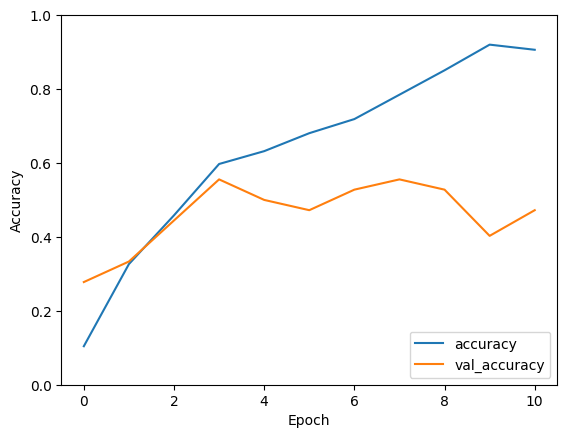

In [12]:
plot_accuracy(history)

In [13]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

3/3 - 0s - 21ms/step - accuracy: 0.4722 - loss: 2.2578


We can see that the same situation is the case for the Convolutional Neural Network. The training accuracy is 55.6% and the validation accuracy is 36.1%. This is also a clear sign of overfitting. The Convolutional Neural Network is a better model for image classification, but I'm guessing that the dataset is too small for this model as well.


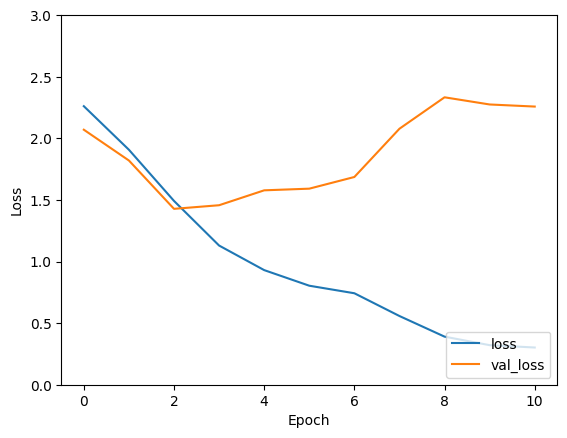

In [14]:
plot_learning_curve(history)

The same situation is visible for the Convolutional Neural Network. The model is learning well at the start, but after about 3 epochs the model starts to overfit the training data.

#### **4.3 ResNet50**

To compare the performance of the Dense and Convolutional Neural Networks, I will use a pre-trained model - ResNet50. ResNet50 is a deep residual network that has 50 layers. It is a model that is trained on the ImageNet dataset. I will use the ResNet50 model with the weights of the ImageNet dataset and add a GlobalAveragePooling2D layer and a Dense layer with 9 units and a softmax activation function.

In [15]:
def build_pretrained_resnet(num_classes=9, input_shape=(128, 128, 3)):
    resnet = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
   
    # Freeze the layers, so they are not trained. 
    for layer in resnet.layers:
        layer.trainable = False
        
    model = Sequential([
        resnet,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

model = build_pretrained_resnet()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.0925 - loss: 2.2811 - val_accuracy: 0.0833 - val_loss: 2.2718
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.1681 - loss: 2.1698 - val_accuracy: 0.0694 - val_loss: 2.2428
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.1223 - loss: 2.1662 - val_accuracy: 0.2500 - val_loss: 2.1926
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.2221 - loss: 2.1366 - val_accuracy: 0.1528 - val_loss: 2.2107
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.2580 - loss: 2.1097 - val_accuracy: 0.0972 - val_loss: 2.1981
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.2143 - loss: 2.1140 - val_accuracy: 0.1528 - val_loss: 2.1654
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.2671 - loss: 2.0818 - val_accuracy: 0.1389 - val_loss: 2.1904
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.2645 - loss: 2.0613 - val_accuracy: 0.0972 - val_loss:

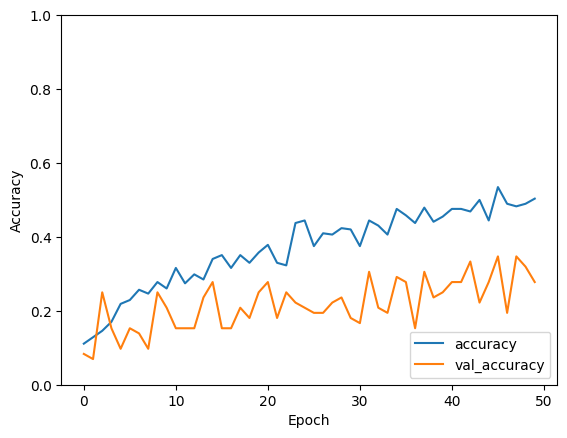

In [16]:
plot_accuracy(history)

3/3 - 0s - 123ms/step - accuracy: 0.2778 - loss: 2.0068


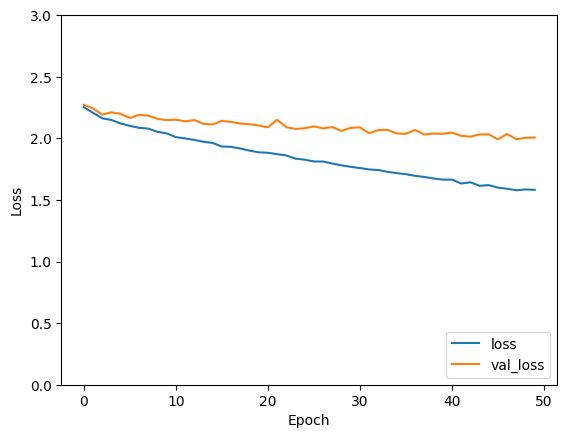

In [17]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

plot_learning_curve(history)

As we can infer from the results, the ResNet50 model also overfits the training data. At first, I thought the reason the previous models overfitted, was because the models were either too simple or too complex. However, the ResNet50 model is known to be a good model for image classification, so I think the the primary reason for the overfitting is the small dataset. Using a larger dataset, or using data augmentation, could improve the performance of, probably, all models.